# 2.5 - A Multimodal Architecture

In [1]:
!wget -nc --no-cache -O init.py -q https://raw.githubusercontent.com/rramosp/2021.deeplearning/main/content/init.py
import init; init.init(force_download=False); 

In [2]:
import sys
if 'google.colab' in sys.modules:
    print ("setting tensorflow version in colab")
    %tensorflow_version 2.x
import tensorflow as tf
tf.__version__

'2.0.0'

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import Image
%matplotlib inline

In [4]:
mnist = pd.read_csv("local/data/mnist1.5k.csv.gz", compression="gzip", header=None).values
X=mnist[:,1:785]/255.
y=mnist[:,0]
print("dimension de las imagenes y las clases", X.shape, y.shape)

dimension de las imagenes y las clases (1500, 784) (1500,)


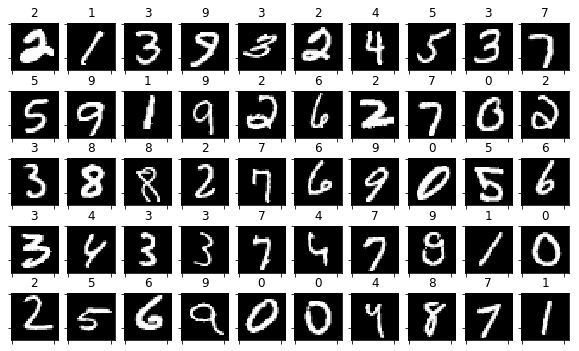

In [5]:
perm = np.random.permutation(list(range(X.shape[0])))[0:50]
random_imgs   = X[perm]
random_labels = y[perm] 
fig = plt.figure(figsize=(10,6))
for i in range(random_imgs.shape[0]):
    ax=fig.add_subplot(5,10,i+1)
    plt.imshow(random_imgs[i].reshape(28,28), interpolation="nearest", cmap = plt.cm.Greys_r)
    ax.set_title(int(random_labels[i]))
    ax.set_xticklabels([])
    ax.set_yticklabels([])

## A regular neural network for classification

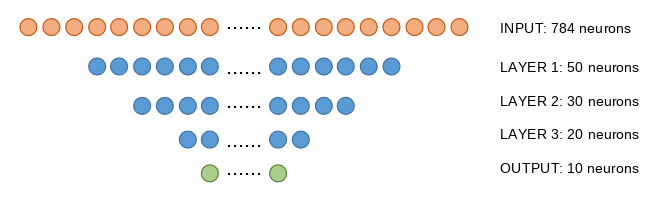

In [7]:
Image(filename='local/imgs/ann1.png')

Number of connections:

    INPUT to LAYER 1:    784*50 + 50 (bias) = 39250
    LAYER 1 to LAYER 2:   50*30 + 30 (bias) = 1530
    LAYER 2 to LAYER 3:   30*20 + 20 (bias) = 620
    LAYER 3 to OUTPUT:    20*10 + 10 (bias) = 210
    
                                         TOTAL 41610

observe we convert `y` to a one_hot encoding

In [8]:
yoh = np.eye(10)[y]

In [9]:
i = np.random.randint(len(y))
y[i], yoh[i]

(0, array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]))

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.8)

X_train, X_test, y_train, y_test = X[:300], X[300:], y[:300], y[300:]
y_train_oh = np.eye(10)[y_train]
y_test_oh  = np.eye(10)[y_test]
print(X_train.shape, y_train_oh.shape)

(300, 784) (300, 10)


### create the model

In [11]:
from tensorflow.keras import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, concatenate, Input
from tensorflow.keras.backend import clear_session

In [12]:
def get_model_A(input_dim, s1, s2, s3, s3_activation="relu"):
    print(input_dim*s1 + s1*s2 + s2*s3 + s3*10 + s1+s2+s3+10)
    clear_session()
    model = Sequential()
    model.add(Dense(s1, activation='relu', input_dim=input_dim))
    model.add(Dense(s2, activation='relu'))
    model.add(Dense(s3, activation=s3_activation))
    model.add(Dense(10, activation='softmax'))

    model.compile(optimizer='adam', loss='categorical_crossentropy')
    model.reset_states()
    return model

In [13]:
model = get_model_A(input_dim=X.shape[1], s1=50, s2=30, s3=20)
model.summary()

41610
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                39250     
_________________________________________________________________
dense_1 (Dense)              (None, 30)                1530      
_________________________________________________________________
dense_2 (Dense)              (None, 20)                620       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                210       
Total params: 41,610
Trainable params: 41,610
Non-trainable params: 0
_________________________________________________________________


### fit and display losses

In [14]:
model.fit(X_train, y_train_oh, epochs=200, batch_size=32, validation_data=(X_test, y_test_oh))

Train on 300 samples, validate on 1200 samples
Epoch 1/200
300/300 [==============================] - 1s 3ms/sample - loss: 2.2490 - val_loss: 2.1885
Epoch 2/200
300/300 [==============================] - 0s 251us/sample - loss: 2.1044 - val_loss: 2.0575
Epoch 3/200
300/300 [==============================] - 0s 282us/sample - loss: 1.9209 - val_loss: 1.8766
Epoch 4/200
300/300 [==============================] - 0s 259us/sample - loss: 1.6828 - val_loss: 1.6790
Epoch 5/200
300/300 [==============================] - 0s 295us/sample - loss: 1.4389 - val_loss: 1.4965
Epoch 6/200
300/300 [==============================] - 0s 262us/sample - loss: 1.2030 - val_loss: 1.3328
Epoch 7/200
300/300 [==============================] - 0s 254us/sample - loss: 0.9906 - val_loss: 1.1614
Epoch 8/200
300/300 [==============================] - 0s 274us/sample - loss: 0.8032 - val_loss: 1.0512
Epoch 9/200
300/300 [==============================] - 0s 246us/sample - loss: 0.6558 - val_loss: 0.9165
Epoch 10/2

Epoch 78/200
300/300 [==============================] - 0s 470us/sample - loss: 0.0020 - val_loss: 1.1302
Epoch 79/200
300/300 [==============================] - 0s 437us/sample - loss: 0.0020 - val_loss: 1.1343
Epoch 80/200
300/300 [==============================] - 0s 488us/sample - loss: 0.0019 - val_loss: 1.1408
Epoch 81/200
300/300 [==============================] - 0s 448us/sample - loss: 0.0018 - val_loss: 1.1372
Epoch 82/200
300/300 [==============================] - 0s 392us/sample - loss: 0.0018 - val_loss: 1.1427
Epoch 83/200
300/300 [==============================] - 0s 341us/sample - loss: 0.0017 - val_loss: 1.1458
Epoch 84/200
300/300 [==============================] - 0s 320us/sample - loss: 0.0017 - val_loss: 1.1533
Epoch 85/200
300/300 [==============================] - 0s 326us/sample - loss: 0.0016 - val_loss: 1.1516
Epoch 86/200
300/300 [==============================] - 0s 450us/sample - loss: 0.0016 - val_loss: 1.1551
Epoch 87/200
300/300 [========================

300/300 [==============================] - 0s 507us/sample - loss: 4.2311e-04 - val_loss: 1.3133
Epoch 154/200
300/300 [==============================] - 0s 408us/sample - loss: 4.1697e-04 - val_loss: 1.3152
Epoch 155/200
300/300 [==============================] - 0s 419us/sample - loss: 4.1003e-04 - val_loss: 1.3180
Epoch 156/200
300/300 [==============================] - 0s 387us/sample - loss: 4.0432e-04 - val_loss: 1.3226
Epoch 157/200
300/300 [==============================] - 0s 395us/sample - loss: 3.9844e-04 - val_loss: 1.3257
Epoch 158/200
300/300 [==============================] - 0s 386us/sample - loss: 3.9274e-04 - val_loss: 1.3235
Epoch 159/200
300/300 [==============================] - 0s 408us/sample - loss: 3.8691e-04 - val_loss: 1.3237
Epoch 160/200
300/300 [==============================] - 0s 363us/sample - loss: 3.8150e-04 - val_loss: 1.3285
Epoch 161/200
300/300 [==============================] - 0s 449us/sample - loss: 3.7564e-04 - val_loss: 1.3296
Epoch 162/200
3

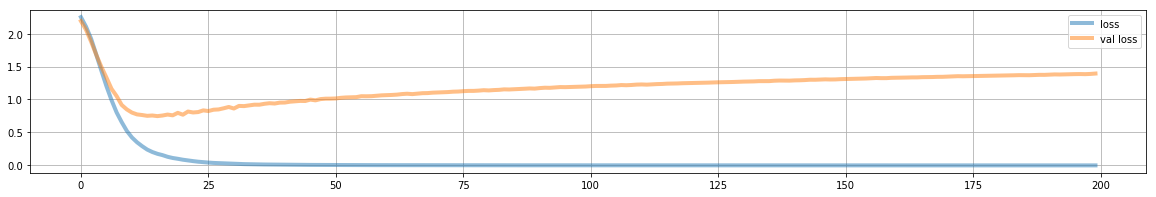

In [16]:
plt.figure(figsize=(20,3))
loss  = model.history.history["loss"]
vloss = model.history.history["val_loss"]
plt.plot(loss, lw=4, alpha=.5, label="loss")
plt.plot(vloss, lw=4, alpha=.5, label="val loss")
plt.grid();
plt.legend();

### measure accuracies

- why are we using argmax below?

In [17]:
preds_train = model.predict(X_train).argmax(axis=1)
preds_test = model.predict(X_test).argmax(axis=1)

print("accuracy train %.3f"%(np.mean(preds_train==y_train)))
print("accuracy test  %.3f"%(np.mean(preds_test==y_test)))

accuracy train 1.000
accuracy test  0.772


## Multimodal network

We will simulate we have information about our data from an additional source. This can be the case when we have, for instance, medical images and associated clinical data. In this situation we have **multimodal data** (images and numeric).

We would like to have an arquitecture in which we can inject both image and numeric data.

In this case, we assume we have an additional information source, telling us with a size 2 vector whether each image contains an odd or even number (with vaues `[1 0]`  or `[0 1]`)

This new info **is injected at LAYER 3** simply concatenating the neurons

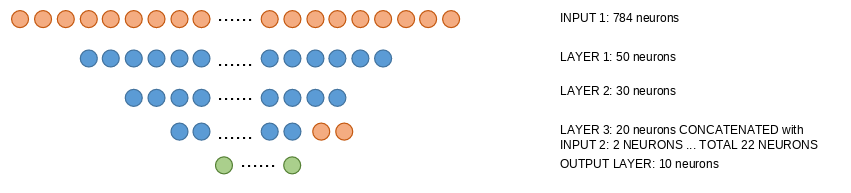

In [18]:
Image(filename='local/imgs/ann2.png')

Number of connections:


    INPUT 1 to LAYER 1:              784*50 + 50 (bias) = 39250
    LAYER 1 to LAYER 2:               50*30 + 30 (bias) = 1530
    LAYER 2 to LAYER 3:               30*20 + 20 (bias) = 620
    LAYER 3 + INPUT 2 to OUTPUT:  (20+2)*10 + 10 (bias) = 230
    
                                                    TOTAL 41630

observe how this new architecture is built, and how the two kinds of information are handled both when building the network or when fitting or predicting

In [19]:
def get_model_B(input_dim, extra_info_dim,  s1, s2, s3, s3_activation="relu"):
    clear_session()
    inp1 = Input(shape=(input_dim,))
    l11 = Dense(s1, activation="relu")(inp1)
    l12 = Dense(s2, activation="relu")(l11)
    l13 = Dense(s3, activation=s3_activation)(l12)
    
    inp2 = Input(shape=(extra_info_dim,))
    cc1 = concatenate([l13, inp2],axis=1) # Merge row, same column
    output = Dense(10, activation='softmax')(cc1)
    model = Model(inputs=[inp1, inp2], outputs=output)
    model.compile(optimizer='adam', loss='categorical_crossentropy')
    model.reset_states()
    return model

We simulate extra information, we could actually have several choices to encode this information, for instance

- `[ 1, 0] [ 0, 1]` or
- `[ 1,-1] [-1, 1]` or
- `[10, 0] [ 0,10]` among others

Observe how **k0**, **k1** control how the data is represented. Try:
    
- k0=0, k1=1
- k0=-0.5, k1=2
- k0=0, k2=10
- k0=-0.5, k1=20

to understand how this coding affects the representation

In [20]:
def get_X_extra(y_train, y_test, k0, k1):
    X_train_extra = (np.eye(2)[y_train%2]+k0)*k1
    X_test_extra  = (np.eye(2)[y_test%2]+k0)*k1
    return X_train_extra, X_test_extra

X_train_extra, X_test_extra = get_X_extra(y_train, y_test, k0=-.5, k1=2)
X_train_extra[:10]

array([[-1.,  1.],
       [ 1., -1.],
       [-1.,  1.],
       [ 1., -1.],
       [ 1., -1.],
       [ 1., -1.],
       [-1.,  1.],
       [-1.,  1.],
       [-1.,  1.],
       [-1.,  1.]])

In [21]:
model = get_model_B(input_dim=X.shape[1], extra_info_dim=X_train_extra.shape[1], s1=50, s2=30, s3=20,
                   s3_activation="tanh")
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 784)]        0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 50)           39250       input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 30)           1530        dense[0][0]                      
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 20)           620         dense_1[0][0]                    
______________________________________________________________________________________________

In [22]:
model.fit([X_train, X_train_extra], y_train_oh, epochs=200, batch_size=32, 
          validation_data=([X_test, X_test_extra], y_test_oh))

Train on 300 samples, validate on 1200 samples
Epoch 1/200
300/300 [==============================] - 1s 2ms/sample - loss: 2.1520 - val_loss: 2.0798
Epoch 2/200
300/300 [==============================] - 0s 284us/sample - loss: 1.8621 - val_loss: 1.8692
Epoch 3/200
300/300 [==============================] - 0s 293us/sample - loss: 1.6337 - val_loss: 1.6862
Epoch 4/200
300/300 [==============================] - 0s 412us/sample - loss: 1.4366 - val_loss: 1.5165
Epoch 5/200
300/300 [==============================] - 0s 656us/sample - loss: 1.2524 - val_loss: 1.3446
Epoch 6/200
300/300 [==============================] - 0s 559us/sample - loss: 1.0697 - val_loss: 1.2176
Epoch 7/200
300/300 [==============================] - 0s 622us/sample - loss: 0.9102 - val_loss: 1.0818
Epoch 8/200
300/300 [==============================] - 0s 571us/sample - loss: 0.7706 - val_loss: 0.9892
Epoch 9/200
300/300 [==============================] - 0s 314us/sample - loss: 0.6539 - val_loss: 0.9076
Epoch 10/2

Epoch 78/200
300/300 [==============================] - 0s 311us/sample - loss: 0.0103 - val_loss: 0.6019
Epoch 79/200
300/300 [==============================] - 0s 309us/sample - loss: 0.0101 - val_loss: 0.6025
Epoch 80/200
300/300 [==============================] - 0s 412us/sample - loss: 0.0099 - val_loss: 0.6038
Epoch 81/200
300/300 [==============================] - 0s 375us/sample - loss: 0.0097 - val_loss: 0.6043
Epoch 82/200
300/300 [==============================] - 0s 347us/sample - loss: 0.0095 - val_loss: 0.6043
Epoch 83/200
300/300 [==============================] - 0s 367us/sample - loss: 0.0093 - val_loss: 0.6068
Epoch 84/200
300/300 [==============================] - 0s 380us/sample - loss: 0.0091 - val_loss: 0.6064
Epoch 85/200
300/300 [==============================] - 0s 402us/sample - loss: 0.0089 - val_loss: 0.6063
Epoch 86/200
300/300 [==============================] - 0s 341us/sample - loss: 0.0087 - val_loss: 0.6077
Epoch 87/200
300/300 [========================

Epoch 155/200
300/300 [==============================] - 0s 463us/sample - loss: 0.0031 - val_loss: 0.6531
Epoch 156/200
300/300 [==============================] - 0s 658us/sample - loss: 0.0030 - val_loss: 0.6541
Epoch 157/200
300/300 [==============================] - 0s 667us/sample - loss: 0.0030 - val_loss: 0.6554
Epoch 158/200
300/300 [==============================] - 0s 796us/sample - loss: 0.0030 - val_loss: 0.6569
Epoch 159/200
300/300 [==============================] - 0s 943us/sample - loss: 0.0029 - val_loss: 0.6572
Epoch 160/200
300/300 [==============================] - 0s 1ms/sample - loss: 0.0029 - val_loss: 0.6573
Epoch 161/200
300/300 [==============================] - 0s 615us/sample - loss: 0.0029 - val_loss: 0.6576
Epoch 162/200
300/300 [==============================] - 0s 519us/sample - loss: 0.0028 - val_loss: 0.6578
Epoch 163/200
300/300 [==============================] - 0s 916us/sample - loss: 0.0028 - val_loss: 0.6594
Epoch 164/200
300/300 [================

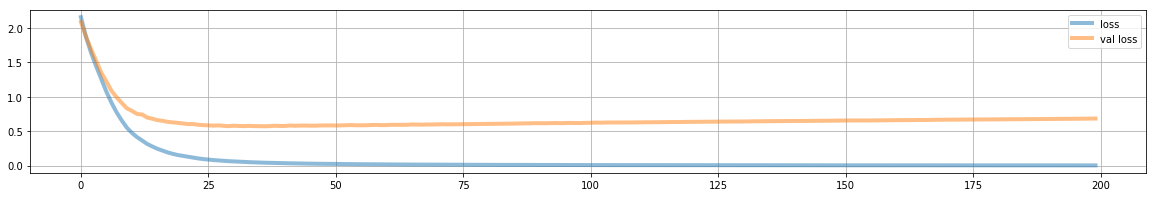

In [23]:
plt.figure(figsize=(20,3))
loss  = model.history.history["loss"]
vloss = model.history.history["val_loss"]
plt.plot(loss, lw=4, alpha=.5, label="loss")
plt.plot(vloss, lw=4, alpha=.5, label="val loss")
plt.grid();
plt.legend();

In [24]:
preds_train = model.predict([X_train, X_train_extra]).argmax(axis=1)
preds_test = model.predict([X_test, X_test_extra]).argmax(axis=1)

print("accuracy train %.3f"%(np.mean(preds_train==y_train)))
print("accuracy test  %.3f"%(np.mean(preds_test==y_test)))

accuracy train 1.000
accuracy test  0.828
